<a href="https://colab.research.google.com/github/Raulfb04/Administraci-n-de-la-producci-n/blob/main/Prog-L1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.optimize import linprog

# =========================================================
# EJERCICIO 1 - Programación Lineal
# Variables:
# x1 = unidades a fabricar del producto p1
# x2 = unidades a fabricar del producto p2
#
# Max Z = 10*x1 + 5*x2
#
# Restricciones:
# (1) x1 + x2 <= 27500               (capacidad)
# (2) 15*x1 + 20*x2 <= 500000        (presupuesto)
# (3) x1 = 3*x2                      (relación de demanda)
# (4) x1 + x2 >= 70000   (si se interpreta literal; pero choca con (1))
# x1, x2 >= 0
# =========================================================

# linprog MINIMIZA, por eso ponemos la función objetivo con signo negativo
c = [-10, -5]

# Restricciones tipo <= (A_ub x <= b_ub)
A_ub = [
    [1, 1],        # capacidad
    [15, 20]       # costo total
]
b_ub = [27500, 500000]

# Restricción de igualdad (A_eq x = b_eq): x1 - 3x2 = 0
A_eq = [[1, -3]]
b_eq = [0]

# No negatividad
bounds = [(0, None), (0, None)]

# -------------------------
# CASO A: incluir x1 + x2 >= 70000 (lo pasamos a <= multiplicando por -1)
# -(x1 + x2) <= -70000
# -------------------------
A_ub_A = A_ub + [[-1, -1]]
b_ub_A = b_ub + [-70000]

res_A = linprog(c, A_ub=A_ub_A, b_ub=b_ub_A, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method="highs")

print("=== CASO A (con demanda total >= 70000) ===")
print("Status:", res_A.message)
if res_A.success:
    x1_A, x2_A = res_A.x
    print(f"x1 = {x1_A:.2f}, x2 = {x2_A:.2f}")
    print("Z max =", -res_A.fun)
else:
    print("No hay solución factible (las restricciones se contradicen).")

# -------------------------
# CASO B: sin la restricción >= 70000 (demanda solo como 'hay mercado suficiente')
# -------------------------
res_B = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method="highs")

print("\n=== CASO B (sin demanda total >= 70000) ===")
print("Status:", res_B.message)
if res_B.success:
    x1_B, x2_B = res_B.x
    print(f"x1 = {x1_B:.2f}, x2 = {x2_B:.2f}")
    print("Z max =", -res_B.fun)

    # Holguras (slacks) de restricciones <=
    # slack = b - A*x  (si slack=0, esa restricción es activa)
    print("\nHolguras:")
    slack_capacidad = 27500 - (x1_B + x2_B)
    slack_costo = 500000 - (15*x1_B + 20*x2_B)
    print("Capacidad (slack) =", slack_capacidad)
    print("Costo (slack)     =", slack_costo)
else:
    print("Algo salió mal, revisa el planteamiento.")

=== CASO A (con demanda total >= 70000) ===
Status: The problem is infeasible. (HiGHS Status 8: model_status is Infeasible; primal_status is None)
No hay solución factible (las restricciones se contradicen).

=== CASO B (sin demanda total >= 70000) ===
Status: Optimization terminated successfully. (HiGHS Status 7: Optimal)
x1 = 20625.00, x2 = 6875.00
Z max = 240625.0

Holguras:
Capacidad (slack) = 0.0
Costo (slack)     = 53125.0


## Conclusión – Ejercicio 1

Al incluir la restricción de demanda total $x_1 + x_2 \ge 70000$,
el modelo se vuelve no factible debido a que contradice la restricción
de capacidad $x_1 + x_2 \le 27500$. Por lo tanto, no existe una solución
que satisfaga simultáneamente ambas condiciones.

Interpretando la demanda total mayor a 70,000 unidades como una condición
de mercado (es decir, que existe demanda suficiente para vender todo lo producido)
y no como una restricción mínima obligatoria, el modelo resulta factible.

La solución óptima encontrada mediante el solver es:

$x_1 = 20625, \quad x_2 = 6875$

con una utilidad máxima de:

$Z_{\max} = 240625$

La restricción de capacidad es activa (holgura = 0), por lo que se utiliza
el 100% de la capacidad instalada. En cambio, la restricción presupuestal
presenta una holgura de \$53,125, indicando que el presupuesto no se agota
completamente.

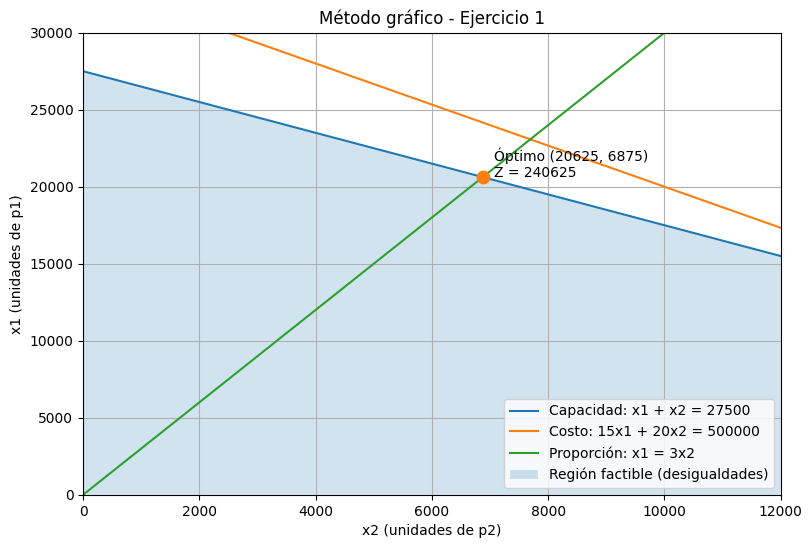

Punto óptimo (Caso B):
x1 = 20625 x2 = 6875
Zmax = 240625


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Rango para x2 (eje horizontal)
x2 = np.linspace(0, 12000, 400)

# Rectas (despejadas para x1 en función de x2)
x1_capacidad = 27500 - x2                 # x1 + x2 = 27500
x1_costo = (500000 - 20*x2) / 15          # 15x1 + 20x2 = 500000
x1_proporcion = 3*x2                      # x1 = 3x2

# Forzamos a que no se grafiquen valores negativos (solo zona útil)
x1_capacidad = np.maximum(x1_capacidad, 0)
x1_costo = np.maximum(x1_costo, 0)

# Punto óptimo (del Caso B)
x2_opt = 6875
x1_opt = 20625
Z_opt = 10*x1_opt + 5*x2_opt

plt.figure(figsize=(9,6))

# Graficar rectas
plt.plot(x2, x1_capacidad, label="Capacidad: x1 + x2 = 27500")
plt.plot(x2, x1_costo, label="Costo: 15x1 + 20x2 = 500000")
plt.plot(x2, x1_proporcion, label="Proporción: x1 = 3x2")

# Sombrear región factible aproximada (sin igualdad), solo para visualizar:
# Factible por desigualdades: x1 <= capacidad, x1 <= costo, x1 >= 0
# (La igualdad x1=3x2 la representamos con su recta)
x1_upper = np.minimum(x1_capacidad, x1_costo)
plt.fill_between(x2, 0, x1_upper, alpha=0.2, label="Región factible (desigualdades)")

# Marcar punto óptimo
plt.scatter([x2_opt], [x1_opt], s=80, zorder=5)
plt.text(x2_opt+200, x1_opt, f"Óptimo ({x1_opt}, {x2_opt})\nZ = {Z_opt}", fontsize=10)

# Detalles de ejes
plt.xlim(0, 12000)
plt.ylim(0, 30000)
plt.xlabel("x2 (unidades de p2)")
plt.ylabel("x1 (unidades de p1)")
plt.title("Método gráfico - Ejercicio 1")
plt.grid(True)
plt.legend()
plt.show()

print("Punto óptimo (Caso B):")
print("x1 =", x1_opt, "x2 =", x2_opt)
print("Zmax =", Z_opt)